In [1]:
pip install pandas sqlalchemy

Note: you may need to restart the kernel to use updated packages.


### Load Data into SQLite

In [30]:
import pandas as pd
from sqlalchemy import create_engine
df = pd.read_csv("vgsales.csv")
engine = create_engine("sqlite:///vgsales.db")
df.to_sql("vgsales", con=engine, if_exists="replace", index=False)

16598

### Verify the Data in SQLite

In [3]:
import sqlite3
conn = sqlite3.connect("vgsales.db")
cursor = conn.cursor()
query = "SELECT * FROM vgsales LIMIT 5;"
result = cursor.execute(query).fetchall()
for row in result:
    print(row)

(1, 'Wii Sports', 'Wii', 2006.0, 'Sports', 'Nintendo', 41.49, 29.02, 3.77, 8.46, 82.74)
(2, 'Super Mario Bros.', 'NES', 1985.0, 'Platform', 'Nintendo', 29.08, 3.58, 6.81, 0.77, 40.24)
(3, 'Mario Kart Wii', 'Wii', 2008.0, 'Racing', 'Nintendo', 15.85, 12.88, 3.79, 3.31, 35.82)
(4, 'Wii Sports Resort', 'Wii', 2009.0, 'Sports', 'Nintendo', 15.75, 11.01, 3.28, 2.96, 33.0)
(5, 'Pokemon Red/Pokemon Blue', 'GB', 1996.0, 'Role-Playing', 'Nintendo', 11.27, 8.89, 10.22, 1.0, 31.37)


### Summarize Sales by Region

In [10]:
conn = sqlite3.connect("vgsales.db")
query = """
SELECT 
    SUM(NA_Sales) AS Total_NA_Sales,
    SUM(EU_Sales) AS Total_EU_Sales,
    SUM(JP_Sales) AS Total_JP_Sales,
    SUM(Global_Sales) AS Total_Global_Sales
FROM vgsales;
"""
result = pd.read_sql_query(query, conn)
print(result)


   Total_NA_Sales  Total_EU_Sales  Total_JP_Sales  Total_Global_Sales
0         4392.95         2434.13         1291.02             8920.44


### Identify Top Platforms by Global Sales

In [12]:
query = """
SELECT 
    Platform,
    SUM(Global_Sales) AS Total_Global_Sales
FROM vgsales
GROUP BY Platform
ORDER BY Total_Global_Sales DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
print(result)

  Platform  Total_Global_Sales
0      PS2             1255.64
1     X360              979.96
2      PS3              957.84
3      Wii              926.71
4       DS              822.49


### Analyze Sales by Year

In [35]:
query = """
SELECT 
    Year,
    SUM(Global_Sales) AS Total_Global_Sales
FROM vgsales
GROUP BY Year
ORDER BY Year;
"""
result = pd.read_sql_query(query, conn)

# Mostrar los resultados
print(result)

      Year  Total_Global_Sales
0      NaN              100.08
1   1980.0               11.38
2   1981.0               35.77
3   1982.0               28.86
4   1983.0               16.79
5   1984.0               50.36
6   1985.0               53.94
7   1986.0               37.07
8   1987.0               21.74
9   1988.0               47.22
10  1989.0               73.45
11  1990.0               49.39
12  1991.0               32.23
13  1992.0               76.16
14  1993.0               45.98
15  1994.0               79.17
16  1995.0               88.11
17  1996.0              199.15
18  1997.0              200.98
19  1998.0              256.47
20  1999.0              251.27
21  2000.0              201.56
22  2001.0              331.47
23  2002.0              395.52
24  2003.0              357.85
25  2004.0              419.31
26  2005.0              459.94
27  2006.0              521.04
28  2007.0              611.13
29  2008.0              678.90
30  2009.0              667.30
31  2010

In [37]:
result.columns

Index(['Year', 'Total_Global_Sales'], dtype='object')

In [39]:
import seaborn as sns

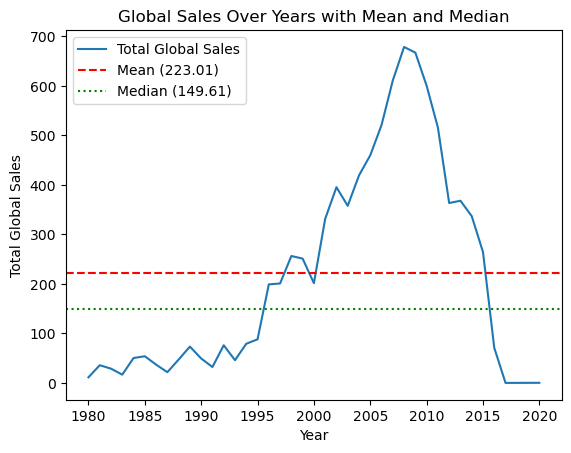

In [41]:
mean_sales = result["Total_Global_Sales"].mean()
median_sales = result["Total_Global_Sales"].median()
sns.lineplot(data=result, x="Year", y="Total_Global_Sales", label="Total Global Sales")
plt.axhline(mean_sales, color="red", linestyle="--", label=f"Mean ({mean_sales:.2f})")
plt.axhline(median_sales, color="green", linestyle=":", label=f"Median ({median_sales:.2f})")
plt.title("Global Sales Over Years with Mean and Median")
plt.xlabel("Year")
plt.ylabel("Total Global Sales")
plt.legend()
plt.show()

### Add Marketing Spend Data

In [19]:
conn = sqlite3.connect("vgsales.db")
create_table_query = """
CREATE TABLE IF NOT EXISTS MarketingSpend (
    Game_Name TEXT,
    Marketing_Spend REAL
);
"""
conn.execute(create_table_query)


In [20]:
insert_data_query = """
INSERT INTO MarketingSpend (Game_Name, Marketing_Spend)
VALUES
    ('Wii Sports', 1000000),
    ('Super Mario Bros.', 800000),
    ('Mario Kart Wii', 1200000),
    ('Wii Sports Resort', 900000),
    ('Pokemon Red/Pokemon Blue', 1100000);
"""
conn.execute(insert_data_query)
conn.commit()

### Perform a Join with Marketing Spend

In [21]:
join_query = """
SELECT 
    vgsales.Name AS Game_Name,
    vgsales.Global_Sales,
    MarketingSpend.Marketing_Spend,
    MarketingSpend.Marketing_Spend / vgsales.Global_Sales AS Spend_Per_Sale
FROM vgsales
JOIN MarketingSpend
ON vgsales.Name = MarketingSpend.Game_Name
ORDER BY Spend_Per_Sale DESC
LIMIT 10;
"""
result = pd.read_sql_query(join_query, conn)

###  Perform a Join with Marketing Spend

In [22]:
print("Top 10 Juegos con Mayor Relación Gasto/Venta:")
print(result)
platform_query = """
SELECT Platform, SUM(Global_Sales) AS Total_Global_Sales
FROM vgsales
GROUP BY Platform
ORDER BY Total_Global_Sales DESC
LIMIT 5;
"""
platform_result = pd.read_sql_query(platform_query, conn)
print("Top 5 Plataformas por Ventas Globales:")
print(platform_result)

Top 10 Juegos con Mayor Relación Gasto/Venta:
                  Game_Name  Global_Sales  Marketing_Spend  Spend_Per_Sale
0         Super Mario Bros.          5.07         800000.0   157790.927022
1         Super Mario Bros.          5.07         800000.0   157790.927022
2  Pokemon Red/Pokemon Blue         31.37        1100000.0    35065.349060
3  Pokemon Red/Pokemon Blue         31.37        1100000.0    35065.349060
4            Mario Kart Wii         35.82        1200000.0    33500.837521
5            Mario Kart Wii         35.82        1200000.0    33500.837521
6         Wii Sports Resort         33.00         900000.0    27272.727273
7         Wii Sports Resort         33.00         900000.0    27272.727273
8         Super Mario Bros.         40.24         800000.0    19880.715706
9         Super Mario Bros.         40.24         800000.0    19880.715706
Top 5 Plataformas por Ventas Globales:
  Platform  Total_Global_Sales
0      PS2             1255.64
1     X360              979.

In [26]:
platform_result.columns

Index(['Platform', 'Total_Global_Sales'], dtype='object')

### Visualize Top Platforms

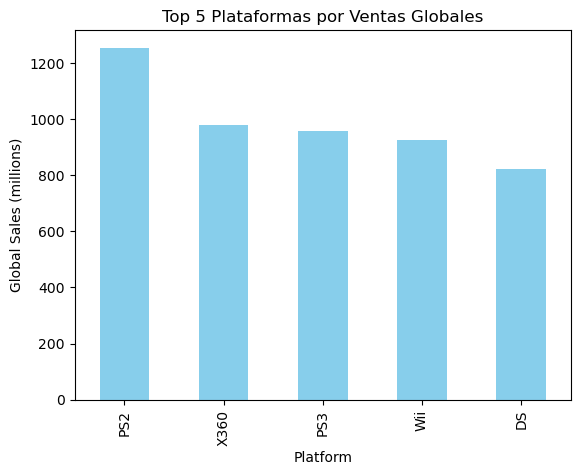

In [27]:
import matplotlib.pyplot as plt
platform_result.plot(kind="bar", x="Platform", y="Total_Global_Sales", legend=False, color="skyblue")
plt.title("Top 5 Plataformas por Ventas Globales")
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.show()

### Platform-Genre Combination

In [28]:
complex_query = """
SELECT 
    vgsales.Platform,
    vgsales.Genre,
    COUNT(vgsales.Name) AS Total_Games,
    AVG(vgsales.Global_Sales) AS Avg_Global_Sales,
    AVG(MarketingSpend.Marketing_Spend) AS Avg_Marketing_Spend,
    AVG(MarketingSpend.Marketing_Spend / vgsales.Global_Sales) AS Avg_Spend_Per_Sale
FROM vgsales
LEFT JOIN MarketingSpend
ON vgsales.Name = MarketingSpend.Game_Name
GROUP BY vgsales.Platform, vgsales.Genre
ORDER BY Avg_Global_Sales DESC
LIMIT 10;
"""
complex_result = pd.read_sql_query(complex_query, conn)
print(complex_result)


Resultados del Query Complejo:
  Platform         Genre  Total_Games  Avg_Global_Sales  Avg_Marketing_Spend  \
0       GB  Role-Playing           22          5.436818            1100000.0   
1      NES       Shooter            7          5.088571                  NaN   
2      NES      Platform           29          4.690345             800000.0   
3      NES     Adventure            1          4.380000                  NaN   
4       GB     Adventure            5          3.432000                  NaN   
5       GB        Puzzle           15          3.164667                  NaN   
6       GB      Platform           20          2.999000             800000.0   
7     WiiU        Racing            3          2.590000                  NaN   
8     SNES      Platform           26          2.525000                  NaN   
9      NES        Racing            4          2.445000                  NaN   

   Avg_Spend_Per_Sale  
0        35065.349060  
1                 NaN  
2        19880.7

### Visualize Platform-Genre Combinations

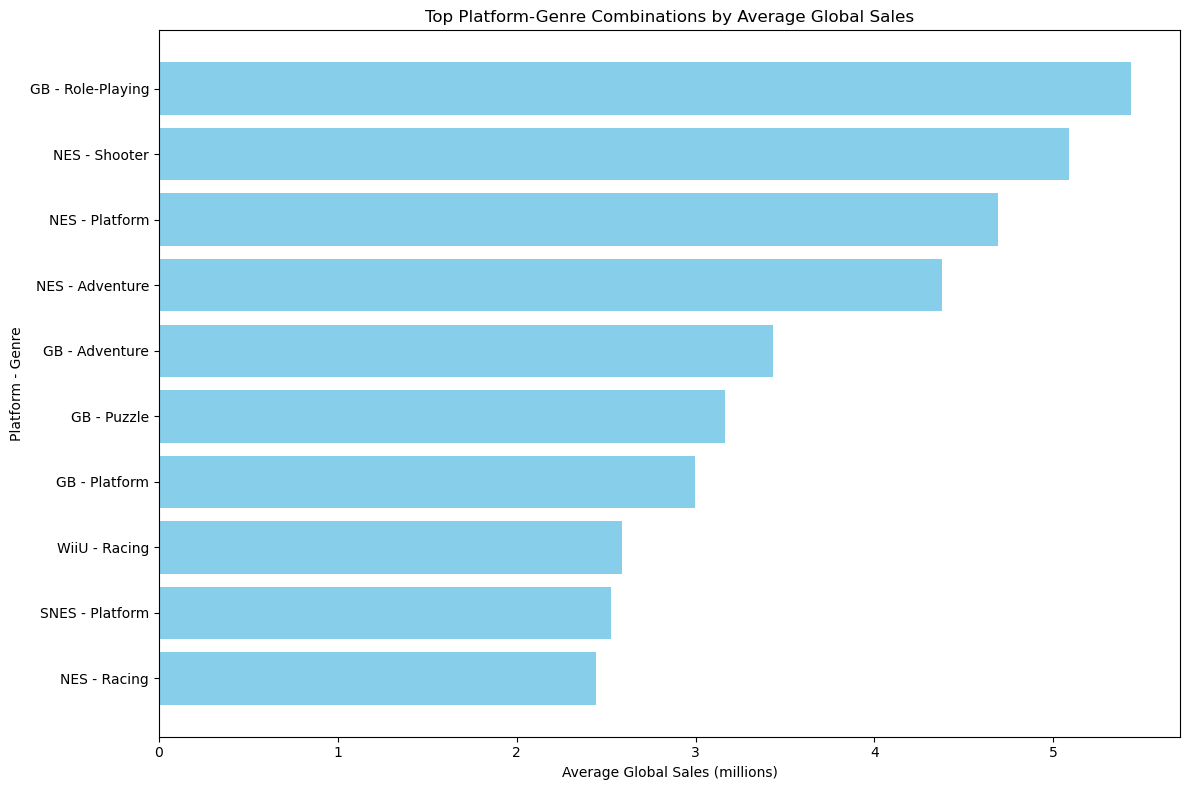

In [34]:
jdf_result = pd.DataFrame(complex_result)
plt.figure(figsize=(12, 8))
plt.barh(df_result["Platform"] + " - " + df_result["Genre"], df_result["Avg_Global_Sales"], color="skyblue")
plt.xlabel("Average Global Sales (millions)")
plt.ylabel("Platform - Genre")
plt.title("Top Platform-Genre Combinations by Average Global Sales")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()